In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
# View first 5 rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
# View last 5 rows
df.tail()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [21]:
# Statistical summary
df.describe()


,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [10]:
# Fill missing state values with 'Unknown'
df['Province/State'] = df['Province/State'].fillna('Unknown')
# If any other columns have missing data, handle accordingly
df = df.fillna(0) 

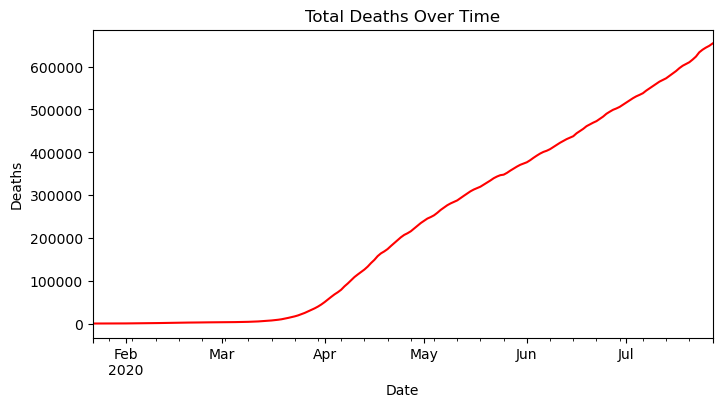

In [12]:
#Total Deaths Over Time (Worldwide)
df.groupby('Date')['Deaths'].sum().plot(title='Total Deaths Over Time', figsize=(8,4), color='red')
plt.ylabel("Deaths")
plt.show()

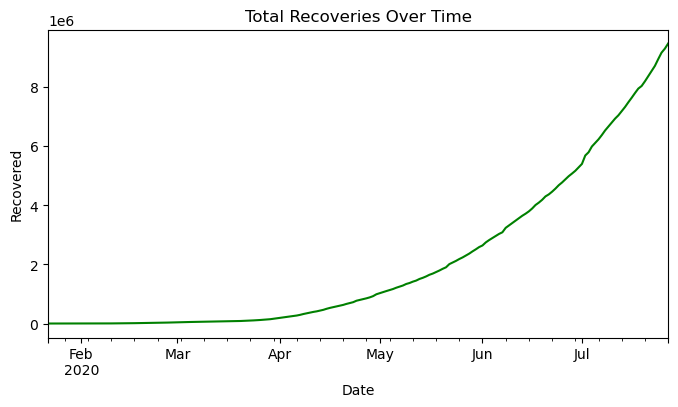

In [13]:
# Total Recoveries Over Time (Worldwide)
df.groupby('Date')['Recovered'].sum().plot(title='Total Recoveries Over Time', figsize=(8,4), color='green')
plt.ylabel("Recovered")
plt.show()

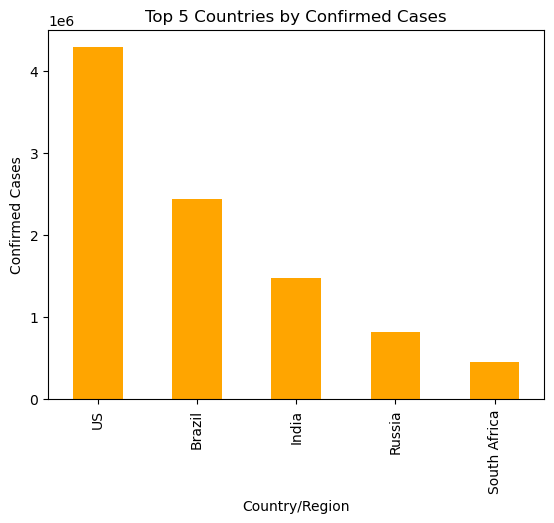

In [14]:
#Top 5 Countries by Confirmed Cases
latest_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).plot(kind='bar', title='Top 5 Countries by Confirmed Cases', color='orange')
plt.ylabel("Confirmed Cases")
plt.show()


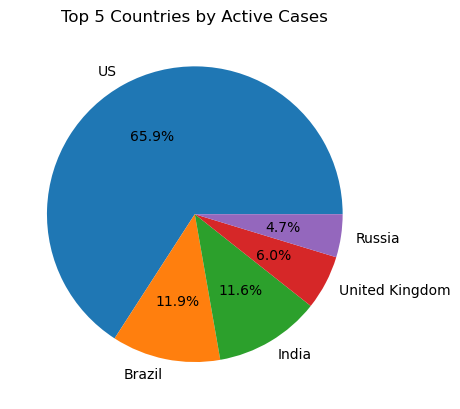

In [24]:
#Active Case Share of Top 5 Countries
latest_data.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', title='Top 5 Countries by Active Cases')
plt.ylabel("")
plt.show()

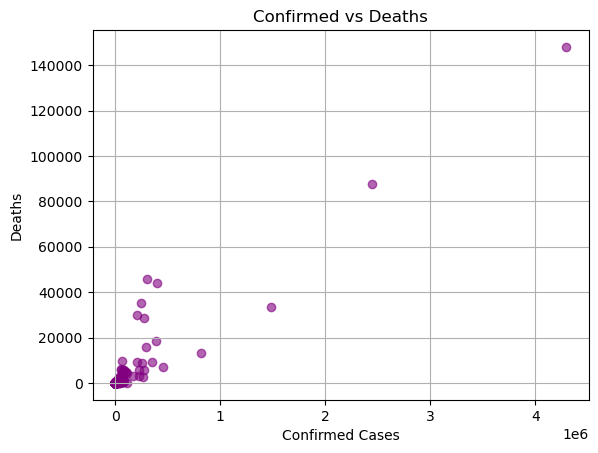

In [17]:
# Confirmed vs Deaths (Latest)
plt.scatter(latest_data['Confirmed'], latest_data['Deaths'], color='purple', alpha=0.6)
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

In [ ]:
These graphs gives us information on:
  Total deaths and recovery trend
  Which countries are most affected
  How severe are active cases in top countries
  What’s the relationship between confirmed and deaths